In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
def generate_exponential_numbers(n, lambda_param): 
    """Генерация случайных чисел по экспоненциальному закону.""" 
    return np.random.exponential(scale=1/lambda_param, size=n) 

In [3]:
def calculate_support_points(random_numbers, bins=20): 
    """Получение опорных точек из случайных чисел.""" 
    hist, bin_edges = np.histogram(random_numbers, bins=bins, density=True) 
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2 
    return list(zip(bin_centers, hist)) 

In [5]:
def calculate_coefficients(support_points): 
    """Вычисление коэффициентов b0 и b1 методом наименьших квадратов.""" 
    ln_y = np.log([y for _, y in support_points if y > 0]) 
    x_vals = np.array([x for x, y in support_points if y > 0]) 
    n_points = len(x_vals) 
 
    b1 = (n_points * np.sum(x_vals * ln_y) - np.sum(x_vals) * np.sum(ln_y)) / (n_points * np.sum(x_vals**2) - (np.sum(x_vals))**2) 
    b0 = (np.sum(ln_y) - b1 * np.sum(x_vals)) / n_points 
    return b0, b1 

In [6]:
def calculate_error(lambda_param, calculated_lambda): 
    """Вычисление погрешности интенсивности потока.""" 
    return abs((calculated_lambda - lambda_param) / lambda_param) * 100 

In [7]:
def plot_results(random_numbers, support_points, lambda_param, calculated_lambda): 
    """Построение графиков результатов.""" 
    # Построение гистограммы 
    plt.hist(random_numbers, bins=20, density=True, alpha=0.7, edgecolor='black', label='Гистограмма') 
 
    # Теоретическая плотность экспоненциального распределения 
    x = np.linspace(0, max(random_numbers), 1000) 
    theoretical_density = lambda_param * np.exp(-lambda_param * x) 
    plt.plot(x, theoretical_density, color='red', label='Теоретическая плотность') 
 
    # Построение графика зависимости плотности обработки от времени 
    bin_centers = [x for x, y in support_points] 
    hist = [y for x, y in support_points] 
    plt.figure() 
    plt.scatter(bin_centers, hist, color='green', label='Опорные точки') 
    plt.plot(x, theoretical_density, color='red', label='Теоретическая плотность') 
    plt.title("Плотность обработки заявок во времени") 
    plt.xlabel("Время поступления заявок") 
    plt.ylabel("Плотность обработки") 
    plt.legend() 
    plt.grid() 
    plt.show() 

In [8]:
def plot_error_vs_n(n_values, errors): 
    """Построение графика зависимости погрешности от n.""" 
    plt.figure() 
    plt.plot(n_values, errors, marker='o', color='purple') 
    plt.title("Зависимость погрешности от количества заявок (n)") 
    plt.xlabel("Количество заявок (n)") 
    plt.ylabel("Погрешность (%)") 
    plt.grid() 
    plt.show() 

In [10]:
def process_experiment(n, lambda_param): 
    """Выполнение полного эксперимента для заданного n и lambda_param.""" 
    random_numbers = generate_exponential_numbers(n, lambda_param) 
    support_points = calculate_support_points(random_numbers) 
    b0, b1 = calculate_coefficients(support_points) 
    calculated_lambda = -b1 
    error = calculate_error(lambda_param, calculated_lambda) 
 
    print(f"n = {n}") 
    print("Координаты опорных точек:") 
    for x, y in support_points: 
        print(f"x: {x:.3f}, y: {y:.3e}") 
    print(f"Вычисленные коэффициенты: b0 = {b0:.3f}, b1 = {b1:.3f}") 
    print(f"Вычисленная интенсивность потока: lambda = {calculated_lambda:.5f}") 
    print(f"Погрешность вычисления интенсивности: {error:.2f}%") 
 
    plot_results(random_numbers, support_points, lambda_param, calculated_lambda) 
    return error 

n = 100
Координаты опорных точек:
x: 19.669, y: 1.015e-02
x: 49.215, y: 6.092e-03
x: 78.762, y: 4.061e-03
x: 108.309, y: 4.061e-03
x: 137.856, y: 4.400e-03
x: 167.403, y: 0.000e+00
x: 196.950, y: 1.354e-03
x: 226.497, y: 6.769e-04
x: 256.044, y: 3.384e-04
x: 285.590, y: 6.769e-04
x: 315.137, y: 3.384e-04
x: 344.684, y: 3.384e-04
x: 374.231, y: 3.384e-04
x: 403.778, y: 0.000e+00
x: 433.325, y: 3.384e-04
x: 462.872, y: 0.000e+00
x: 492.419, y: 0.000e+00
x: 521.965, y: 0.000e+00
x: 551.512, y: 0.000e+00
x: 581.059, y: 6.769e-04
Вычисленные коэффициенты: b0 = -5.176, b1 = -0.006
Вычисленная интенсивность потока: lambda = 0.00649
Погрешность вычисления интенсивности: 35.09%


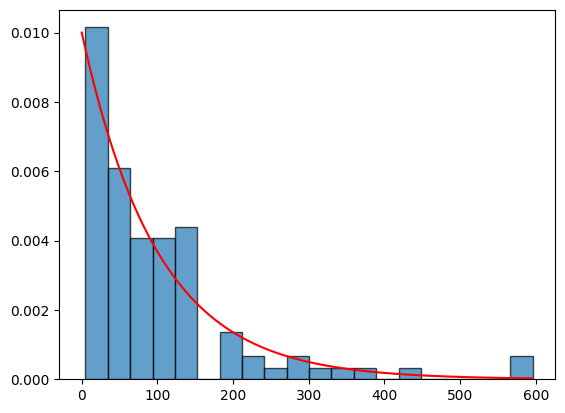

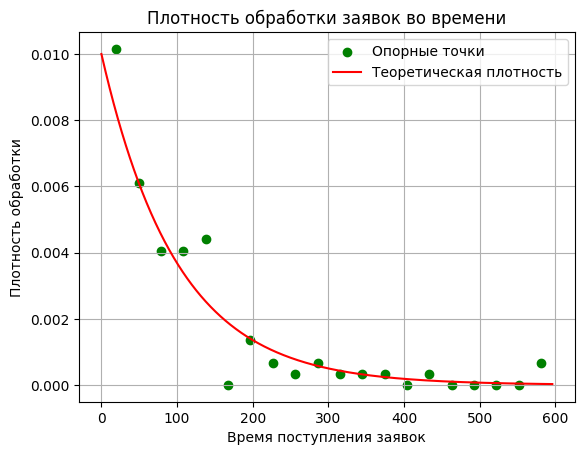

n = 300
Координаты опорных точек:
x: 12.074, y: 7.674e-03
x: 35.965, y: 5.860e-03
x: 59.857, y: 6.418e-03
x: 83.748, y: 5.441e-03
x: 107.639, y: 2.651e-03
x: 131.531, y: 2.372e-03
x: 155.422, y: 2.930e-03
x: 179.314, y: 1.814e-03
x: 203.205, y: 1.535e-03
x: 227.096, y: 1.256e-03
x: 250.988, y: 5.581e-04
x: 274.879, y: 4.186e-04
x: 298.770, y: 5.581e-04
x: 322.662, y: 4.186e-04
x: 346.553, y: 5.581e-04
x: 370.444, y: 2.790e-04
x: 394.336, y: 5.581e-04
x: 418.227, y: 4.186e-04
x: 442.119, y: 0.000e+00
x: 466.010, y: 1.395e-04
Вычисленные коэффициенты: b0 = -4.819, b1 = -0.008
Вычисленная интенсивность потока: lambda = 0.00838
Погрешность вычисления интенсивности: 16.22%


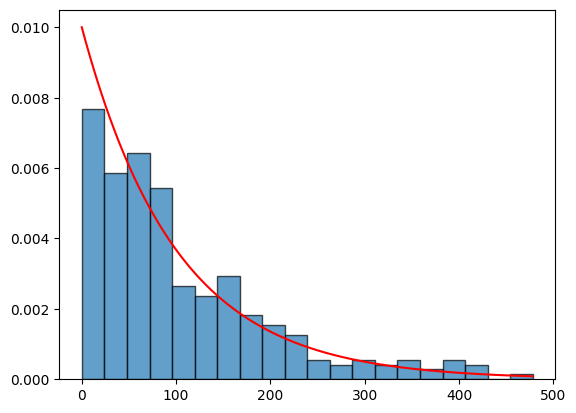

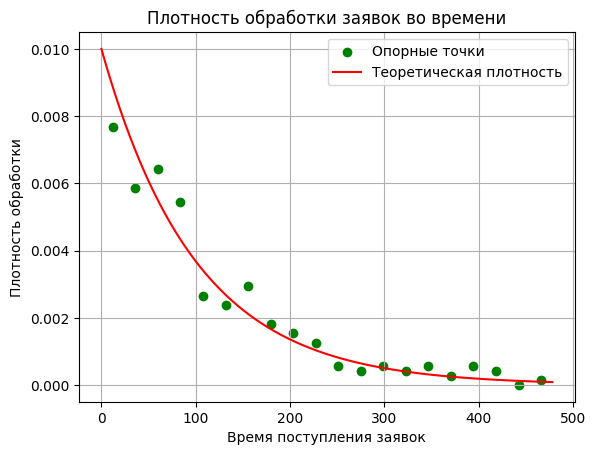

n = 500
Координаты опорных точек:
x: 14.041, y: 8.456e-03
x: 40.293, y: 7.237e-03
x: 66.546, y: 4.876e-03
x: 92.798, y: 4.114e-03
x: 119.050, y: 3.200e-03
x: 145.302, y: 2.743e-03
x: 171.554, y: 2.286e-03
x: 197.806, y: 1.219e-03
x: 224.059, y: 7.618e-04
x: 250.311, y: 9.904e-04
x: 276.563, y: 3.809e-04
x: 302.815, y: 3.809e-04
x: 329.067, y: 2.286e-04
x: 355.319, y: 4.571e-04
x: 381.572, y: 2.286e-04
x: 407.824, y: 7.618e-05
x: 434.076, y: 1.524e-04
x: 460.328, y: 1.524e-04
x: 486.580, y: 7.618e-05
x: 512.832, y: 7.618e-05
Вычисленные коэффициенты: b0 = -4.639, b1 = -0.010
Вычисленная интенсивность потока: lambda = 0.00996
Погрешность вычисления интенсивности: 0.37%


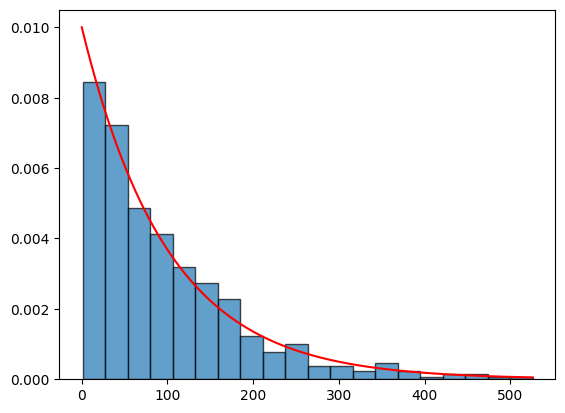

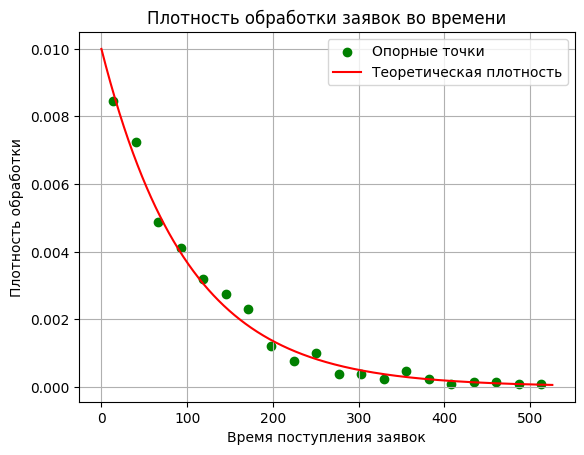

n = 1000
Координаты опорных точек:
x: 20.831, y: 8.574e-03
x: 62.468, y: 5.236e-03
x: 104.104, y: 3.483e-03
x: 145.741, y: 2.426e-03
x: 187.378, y: 1.729e-03
x: 229.015, y: 9.847e-04
x: 270.651, y: 5.764e-04
x: 312.288, y: 3.362e-04
x: 353.925, y: 3.122e-04
x: 395.561, y: 1.681e-04
x: 437.198, y: 2.402e-05
x: 478.835, y: 7.205e-05
x: 520.472, y: 7.205e-05
x: 562.108, y: 0.000e+00
x: 603.745, y: 0.000e+00
x: 645.382, y: 0.000e+00
x: 687.018, y: 0.000e+00
x: 728.655, y: 0.000e+00
x: 770.292, y: 0.000e+00
x: 811.929, y: 2.402e-05
Вычисленные коэффициенты: b0 = -5.031, b1 = -0.009
Вычисленная интенсивность потока: lambda = 0.00857
Погрешность вычисления интенсивности: 14.31%


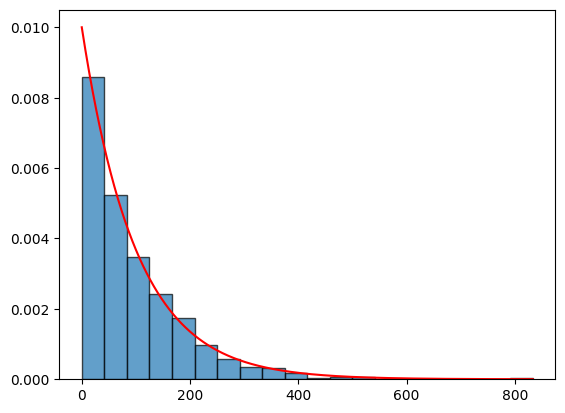

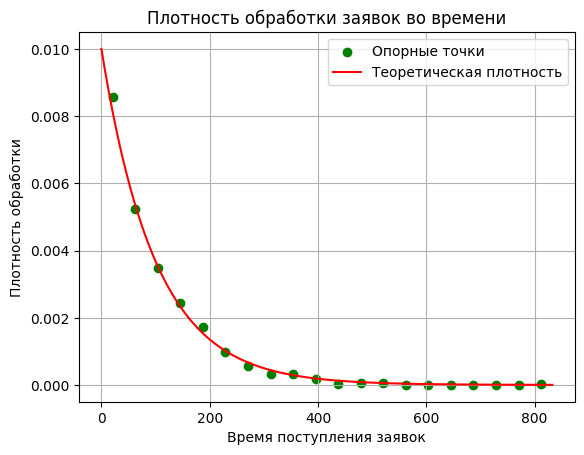

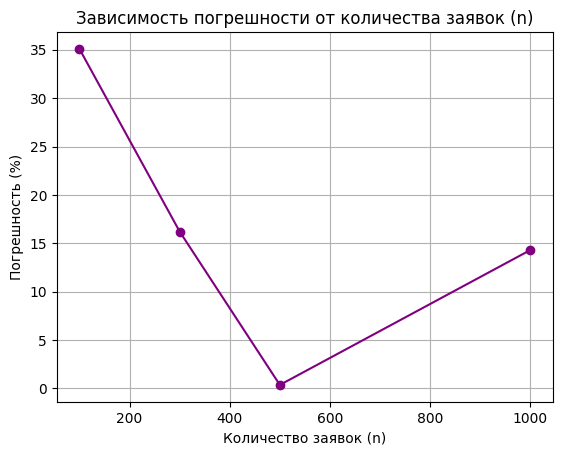

In [11]:
# Задаем параметры 
lambda_param = 0.01 
 
# Выполнение экспериментов для разных значений n 
n_values = [100,300, 500, 1000] 
errors = [] 
 
for n in n_values: 
    error = process_experiment(n, lambda_param) 
    errors.append(error) 
 
# Построение графика зависимости погрешности от n 
plot_error_vs_n(n_values, errors)